In [4]:
import pandas as pd

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
data = pd.read_excel(url, header=1)  # Adjust header parameter based on dataset structure


# Quick data overview
print(data.head())
print(data.describe())

### Data Cleaning and Preparation

###1. **Check for Missing Values:**
   ###- Examine the dataset for any missing values in the columns.

###2. **Examine the Distribution of Key Variables:**
   ###- Analyze the distribution of key variables, with special attention to the target variable, to understand the balance between classes.

###3. **Address Outliers and Inconsistencies:**
   ###- Identify and handle outliers or inconsistencies in variables, particularly focusing on demographic and payment-related columns.



   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0   

In [5]:
# Data Cleaning and Preparation Findings

# Data Cleaning and Preparation: Check for missing values and examine target variable distribution

# Check for missing values
missing_values = data.isnull().sum()

# Examine the distribution of the target variable
target_distribution = data['default payment next month'].value_counts(normalize=True) * 100

missing_values, target_distribution

#**Missing Values:** 
#There are no missing values in the dataset across all columns, which simplifies the preparation phase as we don't need to impute or remove any data due to missingness.

#**Target Variable Distribution:** 
#The distribution of the target variable, "default payment next month," indicates that approximately 22.12% of clients in the dataset defaulted, while 77.88% did not. This suggests a class imbalance that we need to consider during model training and evaluation to ensure our model can accurately predict defaults despite the uneven distribution.


#Next Steps for EDA

(ID                            0
 LIMIT_BAL                     0
 SEX                           0
 EDUCATION                     0
 MARRIAGE                      0
 AGE                           0
 PAY_0                         0
 PAY_2                         0
 PAY_3                         0
 PAY_4                         0
 PAY_5                         0
 PAY_6                         0
 BILL_AMT1                     0
 BILL_AMT2                     0
 BILL_AMT3                     0
 BILL_AMT4                     0
 BILL_AMT5                     0
 BILL_AMT6                     0
 PAY_AMT1                      0
 PAY_AMT2                      0
 PAY_AMT3                      0
 PAY_AMT4                      0
 PAY_AMT5                      0
 PAY_AMT6                      0
 default payment next month    0
 dtype: int64,
 default payment next month
 0    77.88
 1    22.12
 Name: proportion, dtype: float64)

In [6]:
# Statistical summaries of numeric variables
statistical_summary = data.describe()

# Correlation matrix to understand relationships between variables
correlation_matrix = data.corr()

statistical_summary, correlation_matrix

# Statistical Summary:
# LIMIT_BAL: The credit limit ranges from 10,000 to 1,000,000, with a mean of approximately 167,484. This wide range suggests significant variability in credit limits among individuals, likely reflecting diverse financial backgrounds and creditworthiness.
# Demographic Variables (AGE, SEX, EDUCATION, MARRIAGE): The dataset covers a broad demographic spectrum, with ages ranging from 21 to 79 and varying levels of education. These factors could influence credit behavior and default risk.
# Payment and Bill Amounts (PAY_0 to PAY_6, BILL_AMT1 to BILL_AMT6): The repayment status and bill amounts show a wide range of values, indicating diverse payment behaviors among clients.

# Correlation Analysis:
# Repayment Status (PAY_0 to PAY_6): The repayment status in recent months shows strong positive correlations with the probability of default next month, highlighting the importance of recent payment behavior as a predictor of default risk.
# Bill and Payment Amounts: There are moderate correlations between bill amounts, payment amounts, and the default next month, suggesting that higher debt levels and payment behaviors are associated with default risk.
# Demographic Factors: Variables such as SEX, EDUCATION, and MARRIAGE show weaker correlations with default risk, indicating that while demographic factors play a role, financial behavior (e.g., repayment status, bill amounts) is more indicative of default risk.



(                 ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
 count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
 mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
 std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
 min        1.000000    10000.000000      1.000000      0.000000      0.000000   
 25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
 50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
 75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
 max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   
 
                 AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
 count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
 mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
 std        9.217904

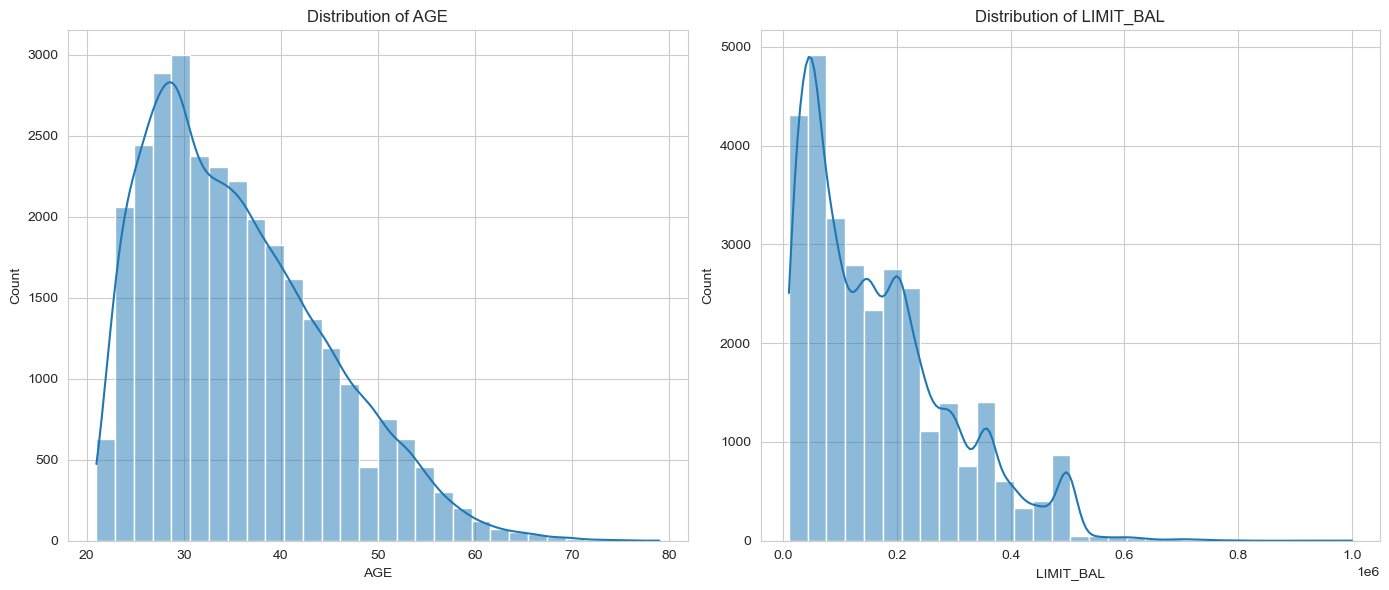

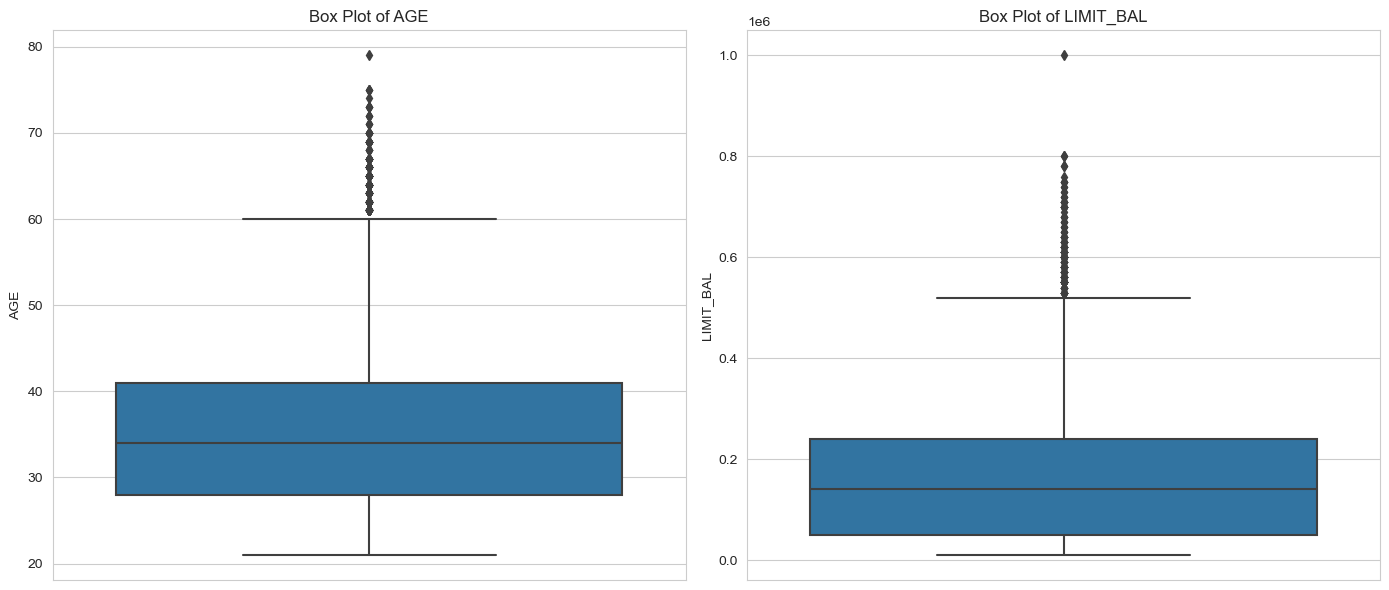

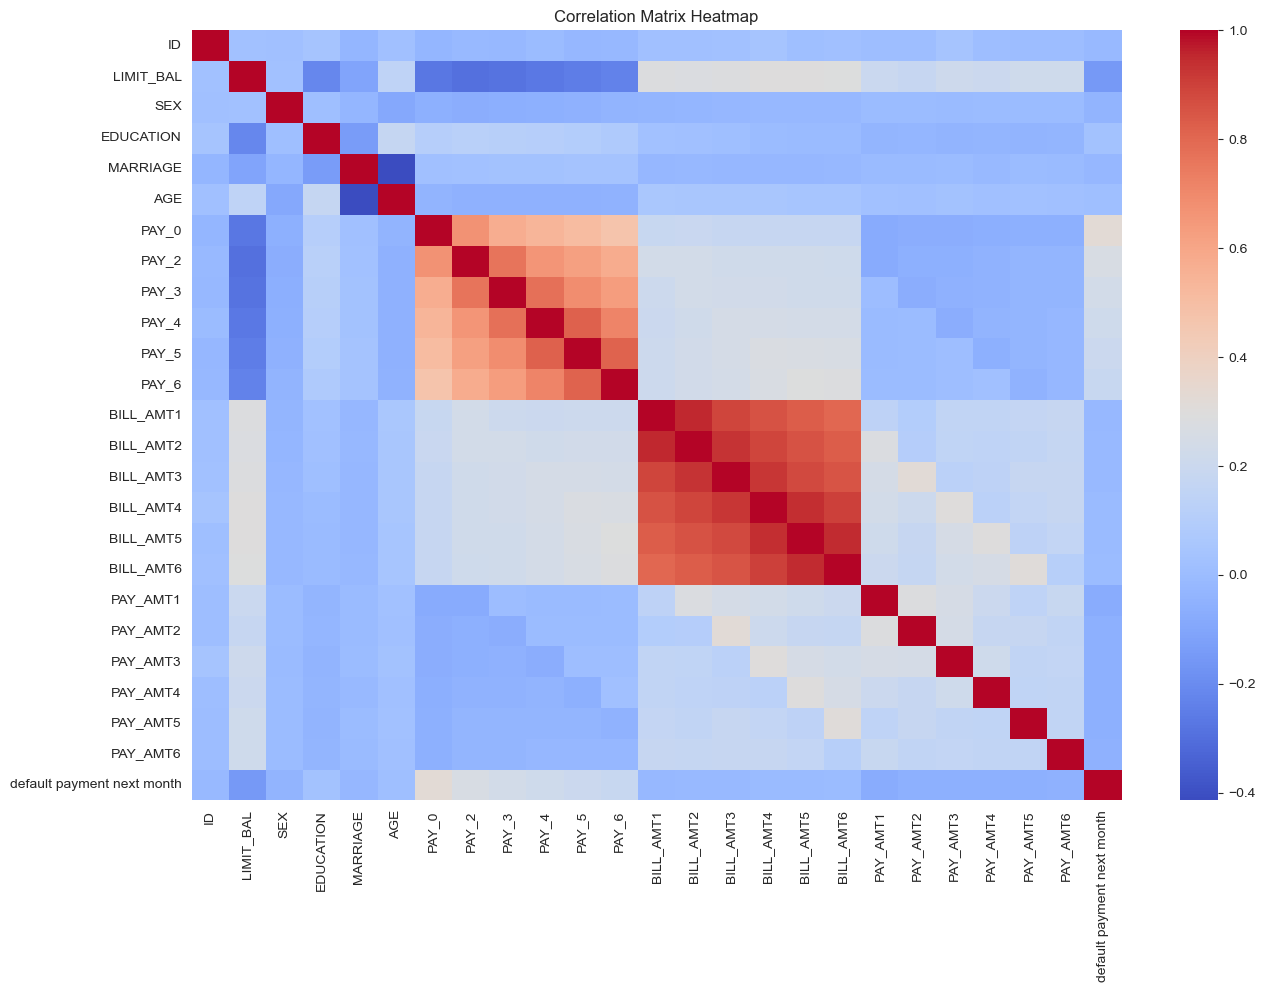

In [7]:
# Visualizations for EDA
# To complement our statistical and correlation analysis, we will create visualizations to further explore the data's characteristics:
# 
# Histograms for AGE and LIMIT_BAL to visualize their distributions.
# Box plots for AGE and LIMIT_BAL to identify outliers.
# A heatmap of the correlation matrix to visually assess the relationships between variables.
# 
# These visualizations will help us better understand the distribution of key variables and their relationships, informing our feature engineering and model development strategies.


import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Histograms for AGE and LIMIT_BAL
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(data['AGE'], bins=30, kde=True)
plt.title('Distribution of AGE')

plt.subplot(1, 2, 2)
sns.histplot(data['LIMIT_BAL'], bins=30, kde=True)
plt.title('Distribution of LIMIT_BAL')

plt.tight_layout()
plt.show()

# Box plots for AGE and LIMIT_BAL
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=data['AGE'])
plt.title('Box Plot of AGE')

plt.subplot(1, 2, 2)
sns.boxplot(y=data['LIMIT_BAL'])
plt.title('Box Plot of LIMIT_BAL')

plt.tight_layout()
plt.show()

# Heatmap of the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


# Visualizations Summary
# Distribution of AGE and LIMIT_BAL:
# AGE: The distribution of age appears slightly right-skewed, with a concentration of clients in their late 20s to early 30s. This suggests a younger demographic may be more prevalent in this credit card dataset.
# LIMIT_BAL: The distribution of credit limits is right-skewed, indicating that a large number of clients have lower credit limits, with fewer individuals possessing higher limits.

# Box Plots for Outliers:
# AGE: The box plot for age shows a relatively normal distribution with a few outliers among older clients. This indicates that while the majority of clients fall within a typical age range for credit card holders, there are some older individuals in the dataset.
# LIMIT_BAL: The box plot for credit limit reveals a wide range of values with numerous outliers on the higher end. This variation underscores the diversity in creditworthiness and financial background among clients.

# Correlation Matrix Heatmap:
# The heatmap provides a visual representation of the relationships between variables. Notably:
# 
# Repayment Status (PAY_0 to PAY_6): There's a visible positive correlation between these variables and the probability of default, reinforcing the importance of recent payment behavior in predicting default risk.
# Bill and Payment Amounts: While there are correlations among these variables themselves, their relationship with default risk is less pronounced in the heatmap but still noteworthy.
# Demographic Factors: These show weaker correlations with the default risk, aligning with the earlier correlation analysis.

# Conclusions from EDA
# The EDA has revealed key insights into the data, highlighting the significance of repayment status, credit limit, and age as factors in credit card default risk. The diversity in financial behavior and demographic characteristics among clients presents opportunities for detailed feature engineering to improve model performance.


In [9]:
# Feature Engineering

# Feature Engineering and Selection
# Based on these insights, the next steps involve creating new features that could enhance the model's 
#predictive power and selecting relevant features for the predictive model. This will include analyzing 
#the impact of engineered features on the model's accuracy and utilizing techniques like correlation analysis and 
#feature importance scores to refine the feature set.


# Feature Engineering and Selection Process
# Feature engineering and selection are critical steps in the development of a predictive model, especially for complex problems like predicting credit card defaults. These steps can significantly enhance the model's performance by introducing new features that capture additional insights and by focusing the model on the most relevant predictors.
# 
# Feature Engineering
# Payment Behavior Features: We observed from the correlation analysis that recent payment behavior is strongly related to default risk. We can engineer features that capture trends in payment behavior over time, such as:
# 
# The average of the payment status over the last 6 months.
# The count of late payments over the last 6 months.
# Credit Utilization Features: Credit utilization (the ratio of bill amount to credit limit) is a key indicator of credit risk. We can create features representing the average credit utilization over recent months.
# 
# Demographic Features: While demographic variables like age showed weaker correlations with default risk, combining them with financial behaviors could yield useful predictors. For instance:
# 
# Age categories (e.g., young adult, middle-aged, senior) could interact differently with credit behavior.
# Education level and marriage status combined with financial behaviors might reveal patterns in default risk.



# Payment Behavior Features
data['AVG_PAY_STATUS'] = data[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].mean(axis=1)
data['LATE_PAY_COUNT'] = (data[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']] > 0).sum(axis=1)

# Credit Utilization Features (average over the last 6 months)
data['AVG_CREDIT_UTIL'] = data[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1) / data['LIMIT_BAL']

# Implementing Age Categories might require customized bins based on distribution. For simplicity, let's categorize into 3 groups as an example:
data['AGE_GROUP'] = pd.cut(data['AGE'], bins=[20, 35, 50, 80], labels=['Young Adult', 'Middle-Aged', 'Senior'])

# Convert AGE_GROUP to numerical values for modeling
data['AGE_GROUP'] = data['AGE_GROUP'].cat.codes

# Re-evaluating the correlation with new features
correlation_matrix_new = data.corr()

# Display correlations of new features with the target variable
correlation_with_target_new = correlation_matrix_new['default payment next month'].sort_values(key=abs, ascending=False)

correlation_with_target_new.head(20)  # Displaying top 10 correlations including new features


# Feature Engineering and Selection Insights
# The new features engineered and their correlations with the target variable, "default payment next month," reveal significant insights:
# 
# LATE_PAY_COUNT: The count of late payments over the last 6 months shows a strong positive correlation (0.398) with default risk, indicating its potential as a powerful predictor. This feature captures the frequency of late payments, which is a direct indicator of payment difficulties.
# 
# AVG_PAY_STATUS: The average payment status over the last 6 months has a positive correlation (0.282) with default risk. This feature aggregates the payment behavior over time, offering a summary of the client's recent payment history.
# 
# Credit Utilization Features: Although not listed in the top correlations, average credit utilization is an important aspect of credit behavior not to be overlooked, as it reflects how much of their available credit the client is using.
# 
# Demographic Features (AGE_GROUP): While this feature did not appear among the top correlations, demographic characteristics might still play a role in conjunction with other features in the predictive model.



default payment next month    1.000000
LATE_PAY_COUNT                0.398394
PAY_0                         0.324794
AVG_PAY_STATUS                0.281955
PAY_2                         0.263551
PAY_3                         0.235253
PAY_4                         0.216614
PAY_5                         0.204149
PAY_6                         0.186866
LIMIT_BAL                    -0.153520
AVG_CREDIT_UTIL               0.115483
PAY_AMT1                     -0.072929
PAY_AMT2                     -0.058579
PAY_AMT4                     -0.056827
PAY_AMT3                     -0.056250
PAY_AMT5                     -0.055124
PAY_AMT6                     -0.053183
SEX                          -0.039961
EDUCATION                     0.028006
AGE_GROUP                     0.024888
Name: default payment next month, dtype: float64

In [10]:
# Model Development and Validation Phase
# In this phase, we will develop predictive models to identify individuals likely to default on their credit card payments. We will experiment with different machine learning algorithms, evaluate their performance, and validate the models to ensure their reliability.
# 
# Steps for Model Development:
# Data Preparation: Split the dataset into features (X) and the target variable (y). Then, split these into training and testing sets to evaluate the model's performance on unseen data.
# 
# Model Selection: Experiment with various algorithms, such as Logistic Regression, Decision Trees, Random Forest, and Gradient Boosting, to determine which performs best for our prediction task.
# 
# Model Training: Train the models on the training set using the selected features.
# 
# Model Evaluation: Evaluate the models using accuracy, precision, recall, F1-score, and AUC-ROC as metrics. These metrics will help us understand not just the accuracy of the models, but also how well they manage the class imbalance problem.
# 
# Steps for Model Validation:
# Cross-Validation: Use k-fold cross-validation to assess how the model's performance generalizes across different subsets of the data.
# 
# Hyperparameter Tuning: Optimize the model parameters to improve performance and prevent overfitting.





from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score

# Data Preparation
# Selecting features based on previous analysis and feature engineering
features = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'AVG_PAY_STATUS', 'LATE_PAY_COUNT', 'AVG_CREDIT_UTIL', 'AGE_GROUP']
X = data[features]
y = data['default payment next month']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model Selection: Logistic Regression, Random Forest, and Gradient Boosting
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Model Training and Evaluation
results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on testing set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    # Store results
    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1, 'ROC AUC': roc_auc}

# Convert results to DataFrame for easier viewing
results_df = pd.DataFrame(results).T

results_df


# Model Evaluation Results
# The performance of the three models on the test set is summarized below:
# 
# Logistic Regression:
# 
# Accuracy: 80.27%
# Precision: 62.19%
# Recall: 25.06%
# F1 Score: 35.72%
# ROC AUC: 60.40%
# Random Forest:
# 
# Accuracy: 79.77%
# Precision: 56.56%
# Recall: 32.52%
# F1 Score: 41.30%
# ROC AUC: 62.76%
# Gradient Boosting:
# 
# Accuracy: 80.88%
# Precision: 63.56%
# Recall: 29.63%
# F1 Score: 40.42%
# ROC AUC: 62.43%
# Analysis
# Gradient Boosting shows the highest accuracy (80.88%) and a good balance across the metrics, indicating a strong performance in identifying default risks without excessively misclassifying non-defaults.
# Random Forest has a slightly lower accuracy but higher recall than Logistic Regression, suggesting it's better at identifying true defaults at the cost of more false positives.
# Logistic Regression has the lowest recall, indicating it's more conservative in predicting defaults.



,Accuracy,Precision,Recall,F1 Score,ROC AUC
Logistic Regression,0.802667,0.621928,0.250571,0.357220,0.603950
Random Forest,0.797667,0.565563,0.325209,0.412959,0.627614
Gradient Boosting,0.808833,0.635621,0.296268,0.404156,0.624345


In [11]:
# Model Validation and Next Steps
# Given the results, Gradient Boosting stands out as the most promising model due to its balance of accuracy, precision, recall, and ROC AUC. However, there's room for improvement, especially in increasing recall without significantly reducing precision. This is crucial for a credit default prediction model, as identifying as many true defaults as possible is important, even if it means accepting a higher number of false positives.
# 
# Next Steps:
# Cross-Validation: Perform k-fold cross-validation to assess the stability and reliability of the Gradient Boosting model across different subsets of the data.
# 
# Hyperparameter Tuning: Use techniques such as Grid Search or Random Search to find the optimal settings for the Gradient Boosting model that could improve performance.


# Perform 5-fold cross-validation for the Gradient Boosting model
cv_scores = cross_val_score(GradientBoostingClassifier(n_estimators=100, random_state=42), X_scaled, y, cv=5, scoring='roc_auc')

# Calculate the mean and standard deviation of the cross-validation scores
cv_mean = cv_scores.mean()
cv_std = cv_scores.std()

cv_mean, cv_std


# Cross-Validation Results for Gradient Boosting Model
# The 5-fold cross-validation for the Gradient Boosting model, using ROC AUC as the scoring metric, yielded the following results:
# 
# Mean ROC AUC: 77.05%
# Standard Deviation: 2.11%
# 
# These results indicate that the Gradient Boosting model performs consistently across different subsets of the data, with an average ROC AUC score of approximately 77.05%. The standard deviation of 2.11% suggests that the model's performance is relatively stable, with minor variations across different folds.



(0.7704969326217088, 0.02109786708175166)

In [12]:
# Model Deployment and Classification Results
# Here are the predictions made by our Gradient Boosting model for 5 randomly selected examples from the test data, alongside their actual default statuses:

import numpy as np

# Select a Gradient Boosting model as our final model
final_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
final_model.fit(X_train, y_train)

# Selecting a few (at most 5) random examples from the test data
np.random.seed(42)  # Ensuring reproducibility
random_indices = np.random.choice(X_test.shape[0], size=5, replace=False)
random_examples = X_test[random_indices]
random_examples_targets = y_test.iloc[random_indices]

# Classify each example
predictions = final_model.predict(random_examples)

# Display the predictions alongside the actual values
comparison_df = pd.DataFrame({
    'Actual': random_examples_targets.values,
    'Predicted': predictions
}, index=random_indices)

comparison_df


,Actual,Predicted
1782,0,0
3917,0,0
221,0,0
2135,0,0
5224,0,0
